# Image compression through Singular Value Decomposition

Load a picture as a 3-dimensional `np.array`

In [5]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = [8, 8]

# write here the import path of the image
#image_path = '...'

A = imread("/Users/akselostmoe/Skole/4. klasse høst 2021/maskinlæring/labs/lab1/data/TarantulaNebula.jpeg")

Visualize the picture

(-0.5, 629.5, 566.5, -0.5)

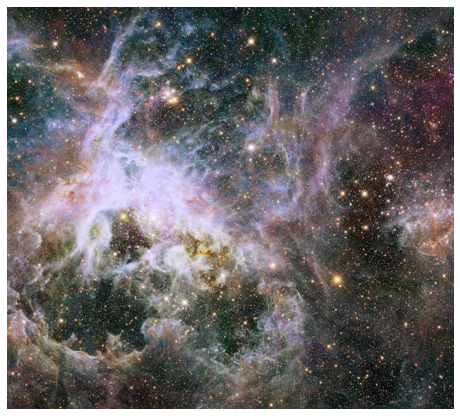

In [6]:
img = plt.imshow(A)
plt.axis('off')

Convert the picture to gray-scale and visualize it.

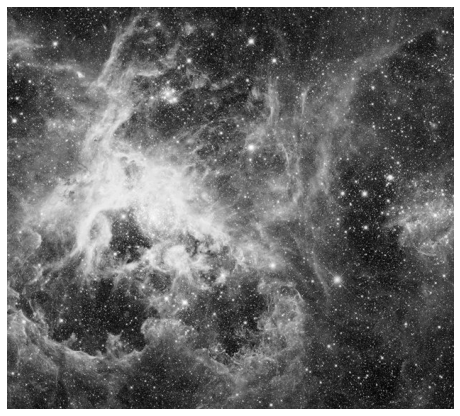

In [12]:
X = np.mean(A, -1)

img = plt.imshow(X)
img.set_cmap("gray")
plt.axis("off")
plt.show()

What is the picture size?

In [13]:
X.shape

(567, 630)

Perform the SVD decomposition

In [50]:
U, S, VT = np.linalg.svd(X, full_matrices=False)
print(U.shape)
print(VT.shape)

(567, 567)
(567, 630)


Plot the trend of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

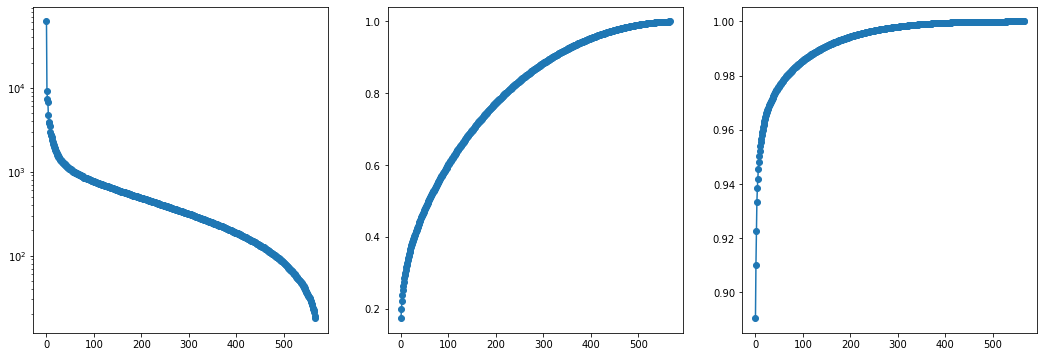

In [25]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (18,6))
axes[0].semilogy(S, 'o-')
# cumulative fraction of singul values
axes[1].plot(np.cumsum(S)/np.sum(S), "o-")
axes[2].plot(np.cumsum(S**2)/np.sum(S**2), "o-")



Visualize the best rank-$k$ matrices, for $k$ = 1, 5, 10, 50, 100, 500

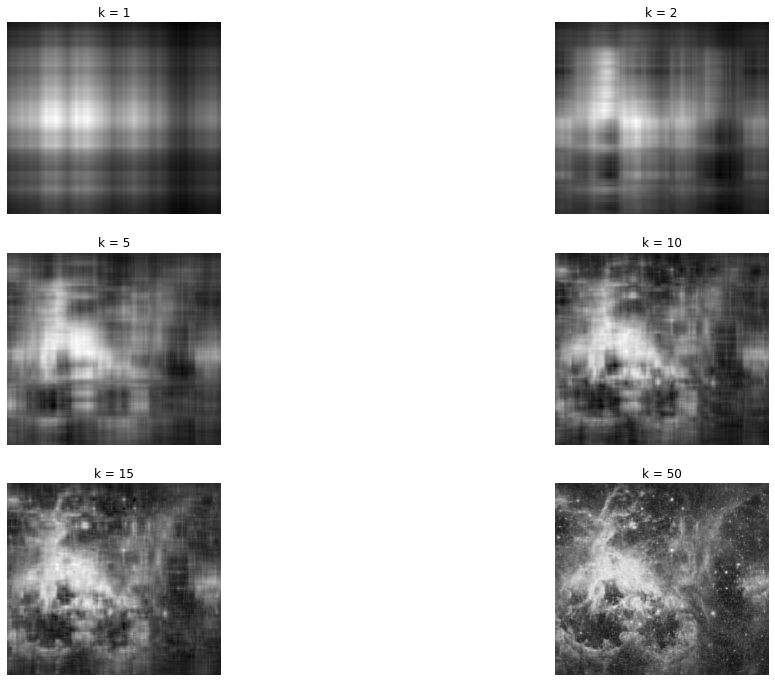

In [49]:
fig, axs = plt.subplots(nrows = 3, ncols = 2, figsize = (18,12))
axs = axs.reshape((-1,))
idxs = [1, 2, 5, 10, 15, 50]
for i in range(len(idxs)):
  k = idxs[i]
  X_k = np.matmul(U[:,:k], np.matmul(np.diag(S[:k]),VT[:k,:]))
  axs[i].imshow(X_k)
  axs[i].set_title('k = %d' % k)
  axs[i].axis('off')
  plt.set_cmap('gray')

Visualize the $k$-th rank-1 matix, for $k$ = 1,2,...,6

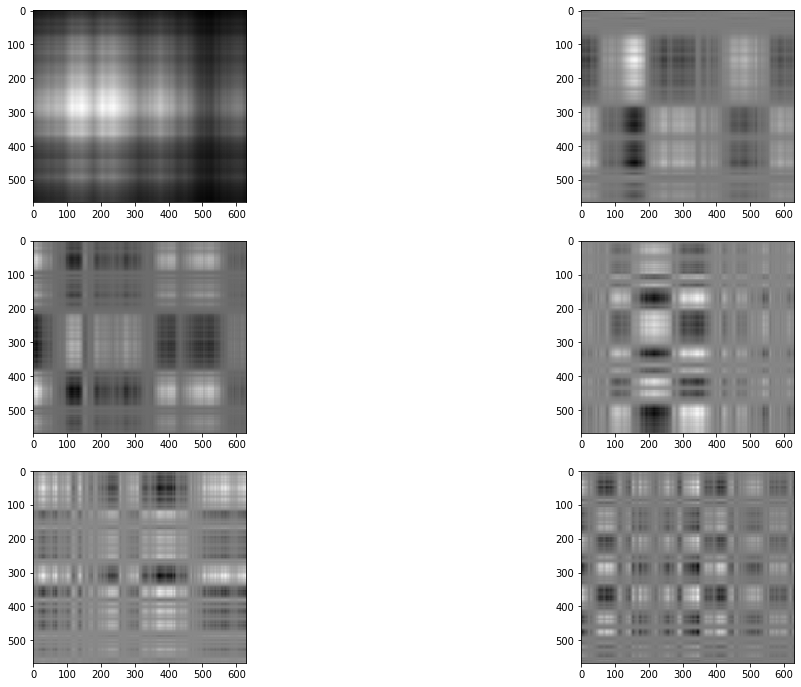

In [47]:
fig, axes = plt.subplots(nrows= 3, ncols=2, figsize=(18,12))
axes = axes.reshape((-1,))
for i in range(6):
    k = i + 1
    X_k = np.dot(U[:,k-1:k], np.dot(np.diag(S[k-1:k]), VT[k-1:k,:]))
    axes[i].imshow(X_k)
    plt.set_cmap("gray")
